In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
# 3 types of asd measures: sky, water, white_reference
# 10 replicates

In [2]:
df1 = pd.read_csv('./processed_data/9mile/9mile_10_sky00000.asd.txt', sep='\t')
df2 = pd.read_csv('./processed_data/9mile/9mile_10_sky00001.asd.txt', sep='\t')
df3 = pd.read_csv('./processed_data/9mile/9mile_10_sky00002.asd.txt', sep='\t')

In [3]:
# rename columns
df1.columns = ["wavelength", "9mile_10_sky"]
df2.columns = ["wavelength", "9mile_10_sky"]
df3.columns = ["wavelength", "9mile_10_sky"]
rep10_9mile_sky = df1[["wavelength"]]

In [4]:
# compute the average of three asd sky measures
rep10_9mile_sky["9mile_sky_asd"] = (df1["9mile_10_sky"] + df2["9mile_10_sky"] + df3["9mile_10_sky"]) / 3

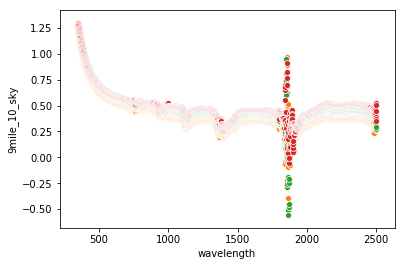

In [5]:
sns.scatterplot(x="wavelength", y="9mile_sky_asd", data=rep10_9mile_sky)
sns.scatterplot(x="wavelength", y="9mile_10_sky", data=df1)
sns.scatterplot(x="wavelength", y="9mile_10_sky", data=df2)
sns.scatterplot(x="wavelength", y="9mile_10_sky", data=df3)

In [6]:
'''
    for each lake
        take the mean of the sub-replicates (limit to 3)
        keep track of std deviation
    
    lake = "9mile"
    number_of_replicates = 10
    data_rel_path = "./processed_data/" + lake + '/'
    for i in range(1, number_of_replicates + 1):
        # get sky file names
        sky_file_names = sorted(glob.glob(data_rel_path + lake + '_' + str(i) + '_sky*asd.txt'))
        sky_df1, sky_df2, sky_df3 = None
    
    for i in range(0, 3):
        sky_file_path = sky_file_names[i]
        sky_df1 = pd.read_csv(sky_file_path, sep='\t')
        sky_df2 = pd.read_csv(sky_file_path, sep='\t')
        sky_df3 = pd.read_csv(sky_file_path, sep='\t')
    
    print(file_list)
    # get water file names
    # sorted(glob.glob(data_rel_path + lake + '_' + str(i) + '_water*asd.txt'))
    
    # get white_reference file names
    # sorted(glob.glob(data_rel_path + lake + '_' + str(i) + '_wr*asd.txt'))
    break
    
'''
        

'\n    for each lake\n        take the mean of the sub-replicates (limit to 3)\n        keep track of std deviation\n    \n    lake = "9mile"\n    number_of_replicates = 10\n    data_rel_path = "./processed_data/" + lake + \'/\'\n    for i in range(1, number_of_replicates + 1):\n        # get sky file names\n        sky_file_names = sorted(glob.glob(data_rel_path + lake + \'_\' + str(i) + \'_sky*asd.txt\'))\n        sky_df1, sky_df2, sky_df3 = None\n    \n    for i in range(0, 3):\n        sky_file_path = sky_file_names[i]\n        sky_df1 = pd.read_csv(sky_file_path, sep=\'\t\')\n        sky_df2 = pd.read_csv(sky_file_path, sep=\'\t\')\n        sky_df3 = pd.read_csv(sky_file_path, sep=\'\t\')\n    \n    print(file_list)\n    # get water file names\n    # sorted(glob.glob(data_rel_path + lake + \'_\' + str(i) + \'_water*asd.txt\'))\n    \n    # get white_reference file names\n    # sorted(glob.glob(data_rel_path + lake + \'_\' + str(i) + \'_wr*asd.txt\'))\n    break\n    \n'

In [39]:
# wil be converted into a data frame
lake_data = {
    "rep_number": [],
    "rep_name": [],
    "rep_ext": [],
    "wavelength": [],
    "asd_measure": []
}

# variables to accumulate the lake data
rep_numbers = []
rep_names = []
rep_exts = []
wavelengths = []
asd_measures = []


lake_name = "9mile"
data_rel_path = "./processed_data/" + lake_name + '/'
data_file_paths =  sorted(glob.glob(data_rel_path + lake_name + '*asd.txt'))
for path in data_file_paths:
    data_file_name = path.split("/")[3]
    rep_number = data_file_name.split("_")[1]
    rep_ext = data_file_name.split("_")[2]
    rep_name = rep_ext.split("0")[0]
    file_data = pd.read_csv(path, sep="\t")
    file_data.columns = ["wavelength", "asd_measure"]
    for row in file_data.iterrows():
        row_data = row[1]
        rep_numbers.append(rep_number)
        rep_names.append(rep_name)
        rep_exts.append(rep_ext)
        wavelengths.append(row_data["wavelength"])
        asd_measures.append(row_data["asd_measure"])

lake_data["rep_number"] = rep_numbers
lake_data["rep_name"] = rep_names
lake_data["rep_ext"] = rep_exts
lake_data["wavelength"] = wavelengths
lake_data["asd_measure"] = asd_measures

lake_data_frame = pd.DataFrame.from_dict(lake_data)
lake_data_frame

,rep_number,rep_name,rep_ext,wavelength,asd_measure
0,10,sky,sky00000.asd.txt,350.0,1.220204
1,10,sky,sky00000.asd.txt,351.0,1.210760
2,10,sky,sky00000.asd.txt,352.0,1.201035
3,10,sky,sky00000.asd.txt,353.0,1.191580
4,10,sky,sky00000.asd.txt,354.0,1.182417
5,10,sky,sky00000.asd.txt,355.0,1.173394
6,10,sky,sky00000.asd.txt,356.0,1.164244
7,10,sky,sky00000.asd.txt,357.0,1.155151
8,10,sky,sky00000.asd.txt,358.0,1.146264
9,10,sky,sky00000.asd.txt,359.0,1.137728
